# Analysis

Determining which sorting algorithm is 'best' for a given use case actually depends on your requirements. If you need the fastest sorter possible, then that's probably quicksort. But if you need good overall performance for a wide variety of input types, you're probably going to want heapsort.

The graphs below show the performance of various algorithms against each other, and then each algorithm's performance is analyzed with different types of inputs.


## Summary

* 'heapsort' had the most consistent performance
* 'quicksort' had the fastest performance
* 'quicksort' had the worst performance

## Notes
* 'dummy_sort' uses the internal Erlang lists:sort/1 method. It is provided as a baseline.

In [260]:
with open("./perf/perf_run.csv") as f:
    lines = f.readlines()
    for line in lines[:10]:
        items = line.split("|")
        print(items)

['alg', 'input', 'items', 'utc', 'ts', 'duration\n']
['dummy_sort', 'constant', '10', '13 Jun 2019 18:29:12.109271', '1560450552116298', '0.000000\n']
['dummy_sort', 'constant', '100', '13 Jun 2019 18:29:12.116502', '1560450552116531', '0.000000\n']
['dummy_sort', 'constant', '1000', '13 Jun 2019 18:29:12.116851', '1560450552116880', '0.000000\n']
['dummy_sort', 'constant', '10000', '13 Jun 2019 18:29:12.117578', '1560450552117597', '0.000000\n']
['dummy_sort', 'constant', '100000', '13 Jun 2019 18:29:12.122349', '1560450552122395', '0.003000\n']
['dummy_sort', 'sorted', '10', '13 Jun 2019 18:29:12.136286', '1560450552136326', '0.000000\n']
['dummy_sort', 'sorted', '100', '13 Jun 2019 18:29:12.136601', '1560450552136634', '0.000000\n']
['dummy_sort', 'sorted', '1000', '13 Jun 2019 18:29:12.137102', '1560450552137139', '0.000000\n']
['dummy_sort', 'sorted', '10000', '13 Jun 2019 18:29:12.138015', '1560450552138061', '0.000000\n']


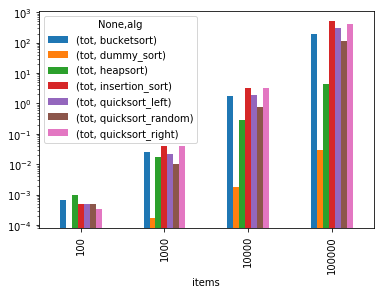

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
df = pd.read_csv("./perf/perf_run.csv", delimiter="|")
pysqldf = lambda q: sqldf(q, globals())
q = pysqldf("select alg, items, avg(duration) as tot from df where items >= 100 group by items, alg order by items desc, tot desc;")
q.groupby(['items', 'alg']).sum(axes='duration').unstack().plot.bar(logy=True, rot=90)

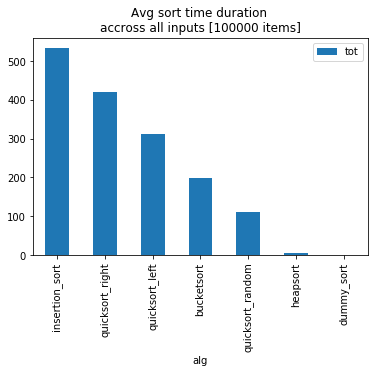

In [262]:
q = pysqldf("select alg, items, avg(duration) as tot from df where items == 100000 group by items, alg order by items desc, tot desc;")
q.plot.bar(x='alg', y='tot', title='Avg sort time duration \naccross all inputs [100000 items]')

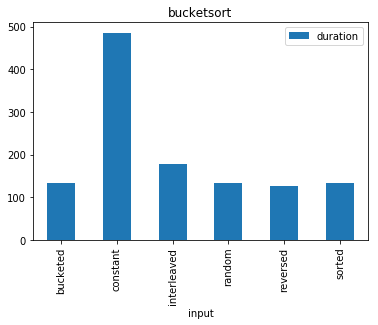

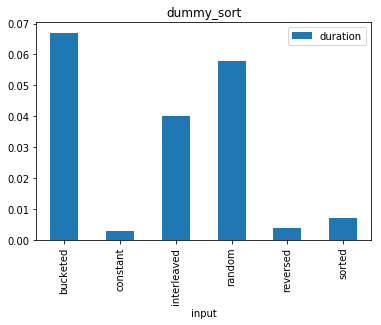

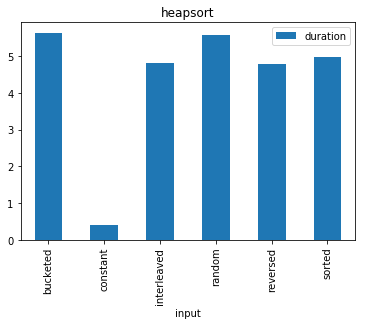

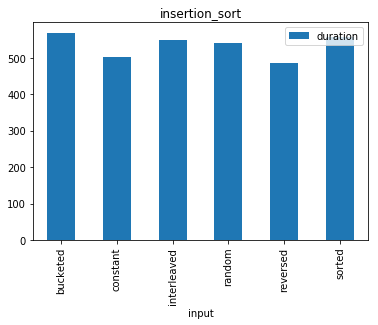

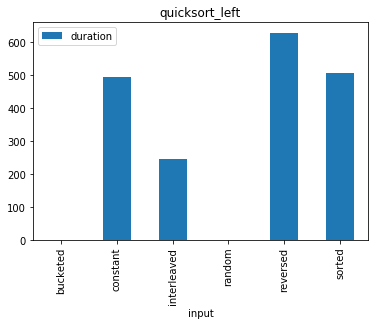

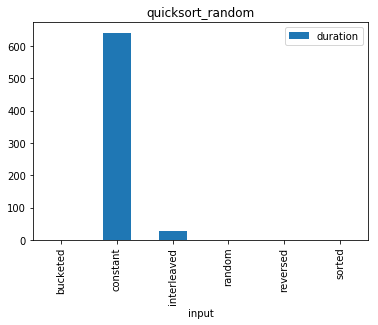

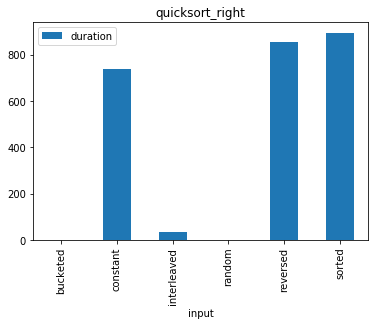

In [263]:
d1 = pysqldf("select alg, input, items, duration from df where items == 100000 order by alg, input;")
d1
for title, group in d1.groupby('alg'):
    group.plot.bar(x='input', y='duration', title=title)

## The best

In [264]:
pysqldf("select alg, input, items, duration from df where items = 100000 and alg != 'dummy_sort' order by duration asc limit 10;")

,alg,input,items,duration
0,quicksort_left,random,100000,0.283
1,quicksort_random,sorted,100000,0.317
2,quicksort_left,bucketed,100000,0.332
3,quicksort_random,reversed,100000,0.332
4,quicksort_random,random,100000,0.340
5,quicksort_random,bucketed,100000,0.347
6,quicksort_right,random,100000,0.368
7,heapsort,constant,100000,0.401
8,quicksort_right,bucketed,100000,0.402
9,heapsort,reversed,100000,4.789


## The worst

In [265]:
pysqldf("select alg, input, items, duration from df where items = 100000 and alg != 'dummy_sort' order by duration desc limit 10;")

,alg,input,items,duration
0,quicksort_right,sorted,100000,893.751
1,quicksort_right,reversed,100000,855.519
2,quicksort_right,constant,100000,739.720
3,quicksort_random,constant,100000,640.628
4,quicksort_left,reversed,100000,628.010
5,insertion_sort,bucketed,100000,568.753
6,insertion_sort,sorted,100000,557.184
7,insertion_sort,interleaved,100000,549.484
8,insertion_sort,random,100000,539.997
9,quicksort_left,sorted,100000,506.240
